### Mean Median Mode 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [6]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [7]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [41]:
0.002392 > 0.05

False

### Age 

In [8]:
mean_age = df['Age'].mean()


In [9]:
median_age = df['Age'].median()

In [10]:
mode_age = df['Age'].mode()

In [13]:
def age_mean(df,var , mean_age):
    df[var+" mean"] = df[var].fillna(mean_age)
    
    
    
    
    
    

In [14]:
age_mean(df,'Age',mean_age)

In [17]:
# median 

def age_median(df,var , median_age):
    return df[var].fillna(median_age)
    
    
    

In [18]:
df.loc[: , 'Age_median'] = age_median(df,'Age',median_age)

In [19]:
df.head()

,Survived,Age,Fare,Age mean,Age_median
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0


In [26]:
mode_age[0]

21.0

In [27]:
## mode

def age_mode(df,var , mode_age):
    return df[var].fillna(mode_age[0])
    

In [28]:
df.loc[: , 'Age_mode'] = age_mode(df,'Age',mode_age)

In [29]:
df.isnull().sum()

Survived       0
Age           86
Fare           1
Age mean       0
Age_median     0
Age_mode       0
dtype: int64

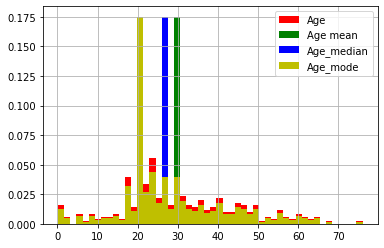

In [31]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

df['Age'].hist(bins = 50 ,ax = ax, color = 'r' , density = True , legend = 'Age')   # 86 null values 
df['Age mean'].hist(bins = 50 ,ax=ax, color = 'g' , density = True , legend = 'Age_mean')
df['Age_median'].hist(bins = 50 ,ax=ax, color = 'b' , density = True , legend = 'Age_median')
df['Age_mode'].hist(bins = 50 , ax=ax,color = 'y' , density = True , legend = 'Age_mode')
plt.legend(loc=0)
plt.show()

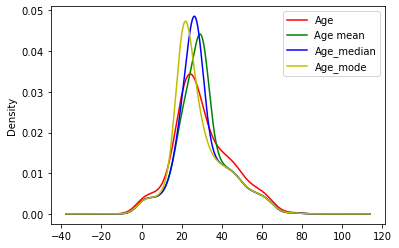

In [34]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind = 'kde',ax = ax, color = 'r'  , legend = 'Age')
df['Age mean'].plot(kind = 'kde',ax=ax, color = 'g'  , legend = 'Age_mean')
df['Age_median'].plot(kind = 'kde' ,ax=ax, color = 'b' , legend = 'Age_median')
df['Age_mode'].plot(kind = 'kde', ax=ax,color = 'y' , legend = 'Age_mode')
plt.legend(loc=0)
plt.show()

<AxesSubplot:>

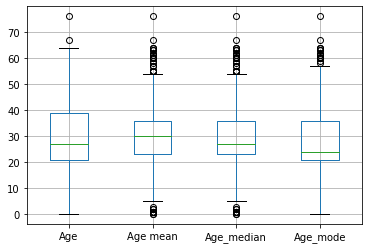

In [35]:
## checking outliers 

df[['Age','Age mean','Age_median','Age_mode']].boxplot()

In [37]:
print("variance for age = {} ".format(df['Age'].var()))
print("variance for age mean = {} ".format(df['Age mean'].var()))
print("variance for age median = {} ".format(df['Age_median'].var()))
print("variance for age mode = {} ".format(df['Age_mode'].var()))

variance for age = 201.10669538455937 
variance for age mean = 159.63145365057315 
variance for age median = 161.38576830860688 
variance for age mode = 173.71546436037778 


In [38]:
df[['Age','Age mean','Age_median','Age_mode','Fare','Survived']].cov()

,Age,Age mean,Age_median,Age_mode,Fare,Survived
Age,201.106695,201.106695,201.106695,201.106695,291.838610,-0.000088
Age mean,201.106695,159.631454,159.631454,159.631454,231.117492,-0.000069
Age_median,201.106695,159.631454,161.385768,164.602146,245.061177,0.049158
Age_mode,201.106695,159.631454,164.602146,173.715464,270.625670,0.139414
Fare,291.838610,231.117492,245.061177,270.625670,3125.657074,5.159417
Survived,-0.000088,-0.000069,0.049158,0.139414,5.159417,0.231960


In [42]:
## fOLLOW SAME PROCESS for fair column too

### Mean Median Mode using simple imputer techniques 

In [43]:
df.head()

,Survived,Age,Fare,Age mean,Age_median,Age_mode
0,0,34.5,7.8292,34.5,34.5,34.5
1,1,47.0,7.0000,47.0,47.0,47.0
2,0,62.0,9.6875,62.0,62.0,62.0
3,0,27.0,8.6625,27.0,27.0,27.0
4,1,22.0,12.2875,22.0,22.0,22.0


In [44]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [45]:
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [1]:
from sklearn.impute import SimpleImputer

In [47]:
mean_imputer = SimpleImputer(strategy='mean')

In [48]:
mean_imputer.fit_transform(data)

array([[ 0.        , 34.5       ,  7.8292    ],
       [ 1.        , 47.        ,  7.        ],
       [ 0.        , 62.        ,  9.6875    ],
       ...,
       [ 0.        , 38.5       ,  7.25      ],
       [ 0.        , 30.27259036,  8.05      ],
       [ 0.        , 30.27259036, 22.3583    ]])

In [49]:
mean_imputer.statistics_

array([ 0.36363636, 30.27259036, 35.62718849])

In [50]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [52]:
mean_imputer_handling = SimpleImputer(missing_values = np.nan , strategy='mean')


In [62]:
data.iloc[: , 1] = mean_imputer_handling.fit_transform(data['Age'].values.reshape(-1,1))

In [63]:
data.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

In [66]:
data.iloc[: , 1:] = mean_imputer_handling.fit_transform(data.iloc[: , 1:])

In [67]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Median

In [204]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [205]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [206]:
median_imputer = SimpleImputer(strategy='median')

In [207]:
median_imputer.fit(data)

SimpleImputer(strategy='median')

In [208]:
median_imputer.statistics_

array([ 0.    , 27.    , 14.4542])

In [209]:
data['Age'].median()

27.0

In [210]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [211]:
median_imputer.transform(data)

array([[ 0.    , 34.5   ,  7.8292],
       [ 1.    , 47.    ,  7.    ],
       [ 0.    , 62.    ,  9.6875],
       ...,
       [ 0.    , 38.5   ,  7.25  ],
       [ 0.    , 27.    ,  8.05  ],
       [ 0.    , 27.    , 22.3583]])

In [212]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [177]:
median_imputer = SimpleImputer(missing_values=np.nan , strategy='median')

In [178]:
data.iloc[: , 1:] = median_imputer.fit_transform(data.iloc[: , 1:])

In [179]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Mode()

In [124]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [125]:
mode_imputer = SimpleImputer(strategy='most_frequent')

In [126]:
mode_imputer.fit_transform(data)

array([[ 0.    , 34.5   ,  7.8292],
       [ 1.    , 47.    ,  7.    ],
       [ 0.    , 62.    ,  9.6875],
       ...,
       [ 0.    , 38.5   ,  7.25  ],
       [ 0.    , 21.    ,  8.05  ],
       [ 0.    , 21.    , 22.3583]])

In [127]:
mode_imputer.statistics_

array([ 0.  , 21.  ,  7.75])

In [128]:
data['Fare'].mode()[0]

7.75

In [129]:
mode_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')


In [130]:
data.iloc[: , 1:] = mode_imputer.fit_transform(data.iloc[: , 1:])

In [131]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### constant (Arbitary value)

In [132]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [133]:
constant_imputer = SimpleImputer(strategy='constant',fill_value=100)

In [134]:
constant_imputer.fit_transform(data)

array([[  0.    ,  34.5   ,   7.8292],
       [  1.    ,  47.    ,   7.    ],
       [  0.    ,  62.    ,   9.6875],
       ...,
       [  0.    ,  38.5   ,   7.25  ],
       [  0.    , 100.    ,   8.05  ],
       [  0.    , 100.    ,  22.3583]])

In [135]:
constant_imputer.statistics_

array([100., 100., 100.])

In [136]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [137]:
constant_imputer = SimpleImputer(missing_values = np.nan , strategy='constant',fill_value=100)


In [138]:
data.iloc[: , 1:] = constant_imputer.fit_transform(data.iloc[: , 1:])

In [139]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### checking 

In [140]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [141]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [142]:
mean_imputer = SimpleImputer(strategy='mean')
data.iloc[: , 1] = mean_imputer.fit_transform(data.iloc[: , 1].values.reshape(-1,1))

In [143]:
data.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

### column transform 

In [154]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [155]:
from sklearn.compose import ColumnTransformer

In [156]:
a = ['Age']
b = ['Fare']

sol = ColumnTransformer(transformers= [
    
    ('mean_imputer' , SimpleImputer(strategy='mean'),a) , 
    ('median_imputer' , SimpleImputer(strategy='median') , b)
    
] , remainder='passthrough')

In [157]:
sol.fit(data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(), ['Age']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [158]:
sol.transformers

[('mean_imputer', SimpleImputer(), ['Age']),
 ('median_imputer', SimpleImputer(strategy='median'), ['Fare'])]

In [159]:
sol.named_transformers_['mean_imputer'].statistics_

array([30.27259036])

In [160]:
data['Age'].mean()

30.272590361445783

In [161]:
data.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [164]:
sol.named_transformers_['median_imputer'].statistics_[0]

14.4542

In [163]:
data['Fare'].median()

14.4542

### Feature engine Library 

In [180]:
!pip install feature-engine

In [181]:
from feature_engine.imputation import MeanMedianImputer

In [182]:
data = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [184]:
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [185]:
a = MeanMedianImputer(imputation_method='mean')

In [186]:
a.fit(data)

MeanMedianImputer(imputation_method='mean')

In [187]:
a.variables_

['Survived', 'Age', 'Fare']

In [188]:
a.imputer_dict_

{'Survived': 0.36363636363636365,
 'Age': 30.272590361445783,
 'Fare': 35.6271884892086}

In [189]:
## feature engine return a data frame while using transform function 

temp = a.transform(data)

In [191]:
temp.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [192]:
temp[a.variables_].isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [193]:
temp.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [195]:
## use only own variables 

b = MeanMedianImputer(imputation_method='median',variables=['Fare'])

In [196]:
b.fit(data)

MeanMedianImputer(variables=['Fare'])

In [197]:
b.variables_

['Fare']

In [198]:
b.imputer_dict_

{'Fare': 14.4542}

In [199]:
data['Fare'].median()

14.4542

In [200]:
c = b.transform(data)  # After transforming fill in some other variable 

In [201]:
c.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [202]:
c.isnull().sum()

Survived     0
Age         86
Fare         0
dtype: int64